In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

! pip install pandarallel

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input/birdclef-2025/train_audio'):
    # for filename in filenames:
        # print(os.path.join(dirname, filename))
        # pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=3f05ff8830b183b1424035e85d9990f10cf3f2e964d0ab692dd808ea6e091c14
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [2]:
labels = {'brtpar1', '1139490', 'compau', 'chbant1', 'yehcar1', 'yecspi2', 'watjac1', 'grasal4', 'grbhaw1', 
          'yebfly1', 'neocor', '81930', 'spbwoo1', '64862', 'grepot1', 'ruther1', 'banana', 'whttro1', 
          '1462711', '42087', '66531', 'soulap1', 'amakin1', '41970', '65373', '714022', 'bafibi1', 'blcant4', 
          'rutjac1', 'plbwoo1', 'anhing', 'yehbla2', '21211', 'recwoo1', 'blbgra1', 'creoro1', 'shtfly1', 
          'amekes', 'blchaw1', '21116', '566513', 'bugtan', 'strcuc1', '1564122', '1462737', 'purgal2', 
          'socfly1', 'gohman1', 'gycwor1', 'bubwre1', 'blhpar1', '65336', 'solsan', '134933', '24292', 
          '42113', 'plukit1', 'savhaw1', 'sobtyr1', 'chfmac1', 'yebsee1', '66016', 'blbwre1', 'mastit1', 
          'smbani', 'whfant1', 'strfly1', 'roahaw', 'rumfly1', '476537', 'butsal1', 'bucmot3', 'colcha1', 
          'bobfly1', '67082', 'rebbla1', 'pavpig2', '1192948', 'whbman1', 'verfly', 'eardov1', 'norscr1', 
          'rinkin1', '67252', 'greibi1', 'greegr', 'cattyr', 'laufal1', 'trokin', 'grekis', 'crebob1', 
          'bubcur1', 'fotfly', 'palhor2', '476538', '24322', 'tropar', 'whwswa1', 'yercac1', '517119', 
          '24272', 'cocher1', 'labter1', 'bicwre1', 'compot1', 'olipic1', 'blcjay1', 'colara1', 'spepar1', 
          'cregua1', 'cargra1', '22976', 'plctan1', '715170', 'leagre', '22973', 'bkmtou1', 'yelori1', 
          'trsowl', 'strher', 'ragmac1', 'yeofly1', '548639', 'tbsfin1', '135045', '65344', 'bkcdon', 
          'stbwoo2', 'piepuf1', '868458', '963335', 'blctit1', 'saffin', 'rtlhum', 'royfly1', '66893', 
          'rutpuf1', 'linwoo1', 'wbwwre1', 'srwswa1', '126247', 'gretin1', 'grnkin', 'littin1', 'secfly1', 
          '41778', '528041', 'bbwduc', 'greani1', 'rubsee1', 'orcpar', 'rosspo1', 'yebela1', '47067', 
          'crcwoo1', '65349', 'snoegr', 'gybmar', 'thbeup1', '66578', 'turvul', 'rugdov', 'baymac', 
          'speowl1', 'cocwoo1', 'cotfly1', 'y00678', '65419', 'bobher1', '52884', '41663', '22333', 
          'piwtyr1', '21038', '787625', 'rufmot1', '65962', 'paltan1', '48124', '555142', '65547', 
          'crbtan1', '1194042', 'ywcpar', 'shghum1', 'cinbec1', 'thlsch3', '1346504', '555086', 'sahpar1', 
          'grysee1', 'blkvul', '523060', 'strowl1', 'whbant1', 'whmtyr1', '65448', 'ampkin1', 'whtdov', 
          'yectyr1', '42007', '46010', 'pirfly1', 'woosto', 'babwar', '50186'}
print(len(labels))

206


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Audio
from scipy.io import wavfile
import soundfile as sf
import tensorflow as tf
import tensorflow_hub as hub
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import scipy.signal
from tqdm import tqdm
flag = 0

In [4]:
def ensure_sample_rate(original_sample_rate, waveform, desired_sample_rate=22000):
    if original_sample_rate != desired_sample_rate:
        desired_length = int(
            round(float(len(waveform))/original_sample_rate * desired_sample_rate))
        waveform = scipy.signal.resample(waveform, desired_length)
    return desired_sample_rate, waveform

In [5]:
def read_audio(filename):
    wav_data, sample_rate = sf.read(file=filename, dtype=np.int16)
    if len(wav_data.shape) > 1:
        wav_data = np.mean(wav_data, axis=1)
    sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)
    return sample_rate, wav_data

In [6]:
import os
import pandas as pd

# Define the root directory containing the audio files
root_dir = '/kaggle/input/birdclef-2025/train_audio' # Adjust if your path is different

# List to store the data for the DataFrame
audio_data_list = []

# Walk through the directory structure
for dirname, _, filenames in os.walk(root_dir):
    # Skip the root directory itself if it doesn't contain class folders directly
    # (Adjust this condition if your structure is different)
    if dirname == root_dir:
        continue

    # Extract the class name (subdirectory name)
    # os.path.basename gets the last part of the directory path
    class_name = os.path.basename(dirname)

    # Iterate through files in the current directory
    for filename in filenames:
        # Construct the full path to the audio file
        full_path = os.path.join(dirname, filename)

        # Append the file path and its class to the list
        audio_data_list.append([full_path, class_name])
        # You can remove the print statement if you don't need it anymore
        # print(full_path) # Optional: print the path as it's processed

# Create the Pandas DataFrame
audio_dataframe = pd.DataFrame(audio_data_list, columns=["audio_path", "class"])

# Display the first few rows of the DataFrame (optional)
print(audio_dataframe.head())

# Display the shape of the DataFrame (optional)
print(f"\nDataFrame shape: {audio_dataframe.shape}")

                                          audio_path    class
0  /kaggle/input/birdclef-2025/train_audio/greani...  greani1
1  /kaggle/input/birdclef-2025/train_audio/greani...  greani1
2  /kaggle/input/birdclef-2025/train_audio/greani...  greani1
3  /kaggle/input/birdclef-2025/train_audio/greani...  greani1
4  /kaggle/input/birdclef-2025/train_audio/greani...  greani1

DataFrame shape: (28564, 2)


In [7]:
df = audio_dataframe.iloc[0]

for i in audio_dataframe['class'].unique():
    df_sub = audio_dataframe[audio_dataframe['class'] == i]
    num_rows = 2
    # print(len(df_sub.index))
    if len(df_sub.index) < num_rows:
        num_rows = len(df_sub.index)
    # print(num_rows)
    df_sub = audio_dataframe[audio_dataframe['class'] == i].iloc[:num_rows]
    # print(df_sub)
    df = pd.concat([df,df_sub])
df['class']

# flag = 0

audio_path        NaN
class             NaN
0             greani1
1             greani1
127           thbeup1
               ...   
27762          528041
27763         yercac1
27764         yercac1
28065         wbwwre1
28066         wbwwre1
Name: class, Length: 414, dtype: object

In [8]:
import pandas as pd
import concurrent.futures
from tqdm.auto import tqdm
import time # Just for mock function
import os # To get cpu count
if flag == 0:
    
    # Get the list of paths to process
    paths_to_process = df['audio_path'].tolist()

    # Determine number of workers (e.g., number of CPU cores)
    # Adjust based on memory constraints and task type (CPU vs I/O bound)
    num_workers = os.cpu_count()
    print(f"Using {num_workers} workers.")

    results = [None] * len(paths_to_process) # Preallocate results list

    print("Starting parallel processing with concurrent.futures...")
    # Use ProcessPoolExecutor for CPU-bound tasks
    with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
        # Use executor.map to apply the function in parallel
        # Wrap executor.map with tqdm for a progress bar
        # executor.map preserves the order of the input iterable
        future_to_path = {executor.submit(read_audio, path): i for i, path in enumerate(paths_to_process)}

        for future in tqdm(concurrent.futures.as_completed(future_to_path), total=len(paths_to_process), desc="Reading audio files"):
            index = future_to_path[future]
            try:
                results[index] = future.result()
            except Exception as exc:
                print(f'Path at index {index} generated an exception: {exc}')
                results[index] = None # Or some other error indicator
    flag = 1
    print("Finished parallel processing.")

    # Assign the results back to the DataFrame
    df['audio_data'] = results
    df.to_pickle('/kaggle/working/df.pk1')
    print(df.head())

Using 4 workers.
Starting parallel processing with concurrent.futures...


Reading audio files:   0%|          | 0/414 [00:00<?, ?it/s]

Path at index 0 generated an exception: Invalid file: nan
Path at index 1 generated an exception: Invalid file: nan
Finished parallel processing.
                                                            0  \
audio_path  /kaggle/input/birdclef-2025/train_audio/greani...   
class                                                 greani1   
0                                                         NaN   
1                                                         NaN   
127                                                       NaN   

                                                   audio_path    class  \
audio_path                                                NaN      NaN   
class                                                     NaN      NaN   
0           /kaggle/input/birdclef-2025/train_audio/greani...  greani1   
1           /kaggle/input/birdclef-2025/train_audio/greani...  greani1   
127         /kaggle/input/birdclef-2025/train_audio/thbeup...  thbeup1   

                  

In [9]:
import re

def audio_data_unfucker(fucked_tuple: tuple) -> list:
        assert(type(fucked_tuple[1]) != int)
        return fucked_tuple[1]

In [10]:
if flag == 1:
    pass
else:
    flag = 1
df = pd.read_pickle('/kaggle/working/df.pk1')
df = df.iloc[2:]
print(df.columns)
df['audio_data'] = df['audio_data'].apply(audio_data_unfucker)

Index([0, 'audio_path', 'class', 'audio_data'], dtype='object')


In [11]:
audio_data = df['audio_data'].copy()

In [12]:
max_len = 1000  # Your desired fixed length
processed_audio = []
processed_labels = []

print(f"Processing audio data with max_len = {max_len}")
print(f"Original DataFrame has {len(df)} rows.")

# Iterate through the DataFrame rows using itertuples (generally faster)
# 'Index' is the DataFrame index, 'audio_data' and 'label' match column names
for row in tqdm(df.itertuples(), total=len(df), desc="Processing Audio"):
    # --- Get data for the current row ---
    # Use getattr for robustness if column names might vary slightly
    # print(row)
    original_seq = getattr(row, 'audio_data')
    original_label = getattr(row, '_3') # Fetch the label

    # Ensure the sequence is a numpy array with the desired dtype
    # This handles cases where 'audio_data' might contain lists
    seq = np.array(original_seq, dtype=np.float32)
    current_len = len(seq)

    # --- Case 1: Sequence is shorter than max_len ---
    if current_len < max_len:
        padding_needed = max_len - current_len
        # Use np.pad which can be cleaner for padding
        padded_seq = np.pad(seq, (0, padding_needed), mode='constant', constant_values=0)
        processed_audio.append(padded_seq)
        processed_labels.append(original_label) # Append the original label

    # --- Case 2: Sequence is exactly max_len ---
    elif current_len == max_len:
        processed_audio.append(seq) # No padding or truncation needed
        processed_labels.append(original_label) # Append the original label

    # --- Case 3: Sequence is longer than max_len ---
    else:
        # Calculate how many full chunks we can get
        num_full_chunks = current_len // max_len

        # Iterate through the sequence, extracting non-overlapping chunks
        for i in range(num_full_chunks):
            start_index = i * max_len
            end_index = start_index + max_len
            chunk = seq[start_index:end_index]
            processed_audio.append(chunk)
            # Append the SAME original label for EACH chunk
            processed_labels.append(original_label)

        # --- Handle the remainder (the part left over after full chunks) ---
        remainder_len = current_len % max_len
        if remainder_len > 0:
            # Extract the remainder
            remainder_start_index = num_full_chunks * max_len
            remainder_chunk = seq[remainder_start_index:]

            # Pad the remainder to max_len
            padding_needed = max_len - remainder_len
            padded_remainder = np.pad(remainder_chunk, (0, padding_needed), mode='constant', constant_values=0)

            processed_audio.append(padded_remainder)
            # Append the SAME original label for the padded remainder chunk
            processed_labels.append(original_label)


# --- Final Output ---
# Convert lists to numpy arrays (common practice for ML/DL)
final_audio_array = np.array(processed_audio)
# Labels can be kept as a list or converted to numpy array/pandas Series
final_labels = processed_labels # Or np.array(processed_labels)

print(f"\nFinished processing.")
print(f"Resulting audio array shape: {final_audio_array.shape}")
# Based on example: (1+1+2+1+1) = 6 samples -> (6, 100)
print(f"Number of resulting labels: {len(final_labels)}")
# Based on example: 6 labels -> ['Short', 'Exact', 'Long', 'Long', 'Long', 'Short_2']
# print("Example processed labels:", final_labels)

Processing audio data with max_len = 1000
Original DataFrame has 412 rows.


Processing Audio:   0%|          | 0/412 [00:00<?, ?it/s]


Finished processing.
Resulting audio array shape: (360928, 1000)
Number of resulting labels: 360928


In [13]:
import pandas as pd
import numpy as np


print(f"Original audio array shape: {final_audio_array.shape}")
print(f"Original number of labels: {len(final_labels)}")


### VARIABLE TO CHANGE
limit_per_label = 1000

# 1. Create a DataFrame with labels and original indices
#    This avoids putting the large audio array into the DataFrame, saving memory.
print("\nCreating temporary DataFrame with labels and indices...")
indices_df = pd.DataFrame({
    'label': final_labels,
    'original_index': np.arange(len(final_labels)) # Store 0, 1, 2, ... N-1
})

# 2. Group by label and select the first 'limit_per_label' indices for each group
print(f"Grouping by label and selecting up to {limit_per_label} indices per group...")
# .head(n) conveniently takes min(n, group_size) automatically
selected_indices_df = indices_df.groupby('label', observed=True).head(limit_per_label)
# 'observed=True' can speed up grouping if labels are categorical

# --- Alternative: Random Sampling (if you don't want the *first* 100) ---
# def sample_or_head(group, n):
#     group_size = len(group)
#     # Sample if group is large enough, otherwise take all (head)
#     return group.sample(n=min(group_size, n), random_state=42) # Use random_state for reproducibility
#
# selected_indices_df = indices_df.groupby('label', observed=True).apply(sample_or_head, n=limit_per_label).reset_index(drop=True)
# print(f"Grouping by label and randomly sampling up to {limit_per_label} indices per group...")
# --- End Alternative ---


# 3. Get the selected original indices
selected_indices = selected_indices_df['original_index'].values

# Ensure the indices are sorted if you want the final array order to be somewhat grouped by label
# This is optional, .head() preserves original relative order within groups.
# selected_indices = np.sort(selected_indices)

print(f"Total indices selected: {len(selected_indices)}")

# 4. Use the selected indices to filter your original arrays
print("Filtering original audio array and labels using selected indices...")
limited_audio_array = final_audio_array[selected_indices]

# Ensure final_labels is a numpy array if it isn't already for fancy indexing
final_labels_array = np.array(final_labels)
limited_labels_array = final_labels_array[selected_indices]

# --- Verification (Optional) ---
print("\n--- Verification ---")
print(f"Limited audio array shape: {limited_audio_array.shape}")
print(f"Limited labels array length: {len(limited_labels_array)}")

# Check counts per label in the limited set
unique_labels, counts = np.unique(limited_labels_array, return_counts=True)
print("Counts per label in the limited dataset:")
for label, count in zip(unique_labels, counts):
    print(f"  Label '{label}': {count} samples")
    if count > limit_per_label:
        print(f"  WARNING: Label '{label}' has more than {limit_per_label} samples!") # Should not happen with .head()

print("\nDownsampling complete.")

# Now use 'limited_audio_array' and 'limited_labels_array' for further steps

Original audio array shape: (360928, 1000)
Original number of labels: 360928

Creating temporary DataFrame with labels and indices...
Grouping by label and selecting up to 1000 indices per group...
Total indices selected: 166725
Filtering original audio array and labels using selected indices...

--- Verification ---
Limited audio array shape: (166725, 1000)
Limited labels array length: 166725
Counts per label in the limited dataset:
  Label '1139490': 1000 samples
  Label '1192948': 1000 samples
  Label '1194042': 1000 samples
  Label '126247': 712 samples
  Label '1346504': 1000 samples
  Label '134933': 1000 samples
  Label '135045': 1000 samples
  Label '1462711': 1000 samples
  Label '1462737': 1000 samples
  Label '1564122': 71 samples
  Label '21038': 1000 samples
  Label '21116': 288 samples
  Label '21211': 228 samples
  Label '22333': 1000 samples
  Label '22973': 1000 samples
  Label '22976': 724 samples
  Label '24272': 588 samples
  Label '24292': 1000 samples
  Label '243

In [14]:
model_yamnet = hub.load('https://tfhub.dev/google/yamnet/1')

In [15]:
@tf.function
def get_embedding(waveform):
    waveform = waveform / tf.int16.max
    _, embedding, _ = model_yamnet(waveform)
    return embedding

audio_embeddings = []
for wav in tqdm(limited_audio_array, desc="Generating Audio Embeddings"):
    emb = get_embedding(wav)
    audio_embeddings.append(emb.numpy())

Generating Audio Embeddings:   0%|          | 0/166725 [00:00<?, ?it/s]

In [16]:
X = np.array(audio_embeddings) # Shape will be (N, 1024)
X_reshaped = np.squeeze(X, axis=1) # Specify axis=1 to remove the middle dimension
print(f"Generated embeddings array X with shape: {X_reshaped.shape}")

# Ensure you have the corresponding labels (length N)
y = limited_labels_array

Generated embeddings array X with shape: (166725, 1024)


In [17]:
from sklearn.preprocessing import LabelEncoder
# --- Label Encoding ---
print("\nEncoding labels...")
# 1. Encode string/object labels to integers (0, 1, 2, ...)
label_encoder = LabelEncoder()
y_integer_encoded = label_encoder.fit_transform(y)

# 2. Determine the number of unique classes
num_classes = len(label_encoder.classes_)
print(f"Found {num_classes} unique classes: {label_encoder.classes_}")

# 3. Convert integer labels to one-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y_integer_encoded, num_classes=num_classes)
print(f"One-hot encoded labels shape: {y_one_hot.shape}") # Should be (N, num_classes)

# --- Train/Test Split ---
print("\nSplitting data into training and testing sets...")
xtrain, xtest, ytrain_one_hot, ytest_one_hot = train_test_split(
    X_reshaped,                      # Your embeddings array (N, 1024)
    y_one_hot,              # Your one-hot encoded labels (N, num_classes)
    test_size=0.2,          # Fraction for the test set
    random_state=42,        # For reproducibility
    stratify=y_integer_encoded # IMPORTANT: Stratify based on original integer labels
                               # to ensure class balance in train/test sets
)

print(f"xtrain shape: {xtrain.shape}") # (N * 0.8, 1024)
print(f"ytrain_one_hot shape: {ytrain_one_hot.shape}") # (N * 0.8, num_classes)
print(f"xtest shape: {xtest.shape}") # (N * 0.2, 1024)
print(f"ytest_one_hot shape: {ytest_one_hot.shape}") # (N * 0.2, num_classes)


Encoding labels...
Found 206 unique classes: ['1139490' '1192948' '1194042' '126247' '1346504' '134933' '135045'
 '1462711' '1462737' '1564122' '21038' '21116' '21211' '22333' '22973'
 '22976' '24272' '24292' '24322' '41663' '41778' '41970' '42007' '42087'
 '42113' '46010' '47067' '476537' '476538' '48124' '50186' '517119'
 '523060' '528041' '52884' '548639' '555086' '555142' '566513' '64862'
 '65336' '65344' '65349' '65373' '65419' '65448' '65547' '65962' '66016'
 '66531' '66578' '66893' '67082' '67252' '714022' '715170' '787625'
 '81930' '868458' '963335' 'amakin1' 'amekes' 'ampkin1' 'anhing' 'babwar'
 'bafibi1' 'banana' 'baymac' 'bbwduc' 'bicwre1' 'bkcdon' 'bkmtou1'
 'blbgra1' 'blbwre1' 'blcant4' 'blchaw1' 'blcjay1' 'blctit1' 'blhpar1'
 'blkvul' 'bobfly1' 'bobher1' 'brtpar1' 'bubcur1' 'bubwre1' 'bucmot3'
 'bugtan' 'butsal1' 'cargra1' 'cattyr' 'chbant1' 'chfmac1' 'cinbec1'
 'cocher1' 'cocwoo1' 'colara1' 'colcha1' 'compau' 'compot1' 'cotfly1'
 'crbtan1' 'crcwoo1' 'crebob1' 'cregua1' 

In [18]:
print("\nDefining and compiling the model...")
# --- Define Model ---
model = models.Sequential([
    # Input shape is now (1024,) after averaging embeddings
    layers.Input(shape=(1024,)),
    # Flatten layer is not needed if input is 1D before Dense
    # layers.Flatten(), # Remove this
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(200, activation='relu'),
    # Output layer must have 'num_classes' units
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

# --- Compile Model ---
# Using categorical_crossentropy because ytrain is one-hot encoded
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")


Defining and compiling the model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │         205,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 206)                 │          41,406 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,006 (1.40 MB)

 Trainable params: 367,006 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

Model compiled successfully.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (usually validation loss or accuracy)
    patience=3,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Set to 1 to print messages when stopping happens
    mode='min',          # 'min' for loss/error metrics, 'max' for accuracy metrics
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [20]:
# --- Train Model ---
print("\nStarting model training...")
epochs = 100
history = model.fit(
    xtrain,
    ytrain_one_hot,
    epochs=epochs,
    validation_split=0.1, # Optional: use part of training data for validation during training
    callbacks=[early_stopping]
    # Or use validation_data=(xtest, ytest_one_hot) - be careful not to "tune" on test set
)

print("Model training finished.")

# --- Evaluate Model (Optional) ---
print("\nEvaluating model on the test set...")
loss, accuracy = model.evaluate(xtest, ytest_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Starting model training...
Epoch 1/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.1581 - loss: 3.8304 - val_accuracy: 0.3905 - val_loss: 2.4120
Epoch 2/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.3790 - loss: 2.4309 - val_accuracy: 0.4643 - val_loss: 2.0836
Epoch 3/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.4489 - loss: 2.1147 - val_accuracy: 0.5115 - val_loss: 1.8607
Epoch 4/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.4861 - loss: 1.9399 - val_accuracy: 0.5313 - val_loss: 1.7735
Epoch 5/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.5107 - loss: 1.8232 - val_accuracy: 0.5640 - val_loss: 1.6389
Epoch 6/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.5318 - loss: 1.7408 - val_accuracy: 0.5817 - val_loss: 1.5637
Epoch 7/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.5472 - loss: 1.6692 - val_accuracy: 0.5857 - val_loss: 1.5500
Epoch 8/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 30s 8

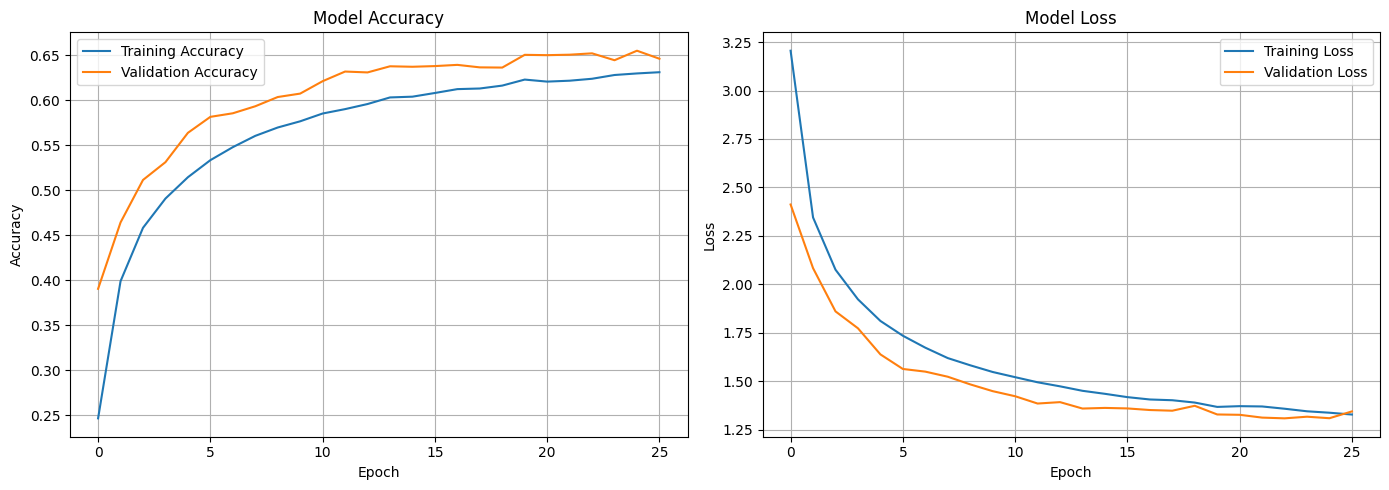

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# ---- Accuracy ----
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# ---- Loss ----
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [22]:
ytest_pred_probs = model.predict(xtest)  # Probabilities (N, 206)
ytest_pred_labels = np.argmax(ytest_pred_probs, axis=1)  # Predicted class indices
ytest_true_labels = np.argmax(ytest_one_hot, axis=1)     # True class indices

from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(ytest_true_labels, ytest_pred_labels, target_names=label_encoder.classes_))

1043/1043 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

Classification Report:
              precision    recall  f1-score   support

     1139490       0.17      0.06      0.08       200
     1192948       0.23      0.36      0.28       200
     1194042       0.67      0.43      0.53       200
      126247       0.93      0.99      0.96       142
     1346504       0.65      0.92      0.76       200
      134933       0.93      0.99      0.96       200
      135045       0.62      0.81      0.70       200
     1462711       0.45      0.36      0.40       200
     1462737       0.16      0.07      0.10       200
     1564122       0.88      0.50      0.64        14
       21038       0.81      0.89      0.85       200
       21116       0.78      0.81      0.80        58
       21211       0.53      0.89      0.67        46
       22333       0.70      0.72      0.71       200
       22973       0.88      0.94      0.91       200
       22976       0.62      0.54      0.58       145
       24272  

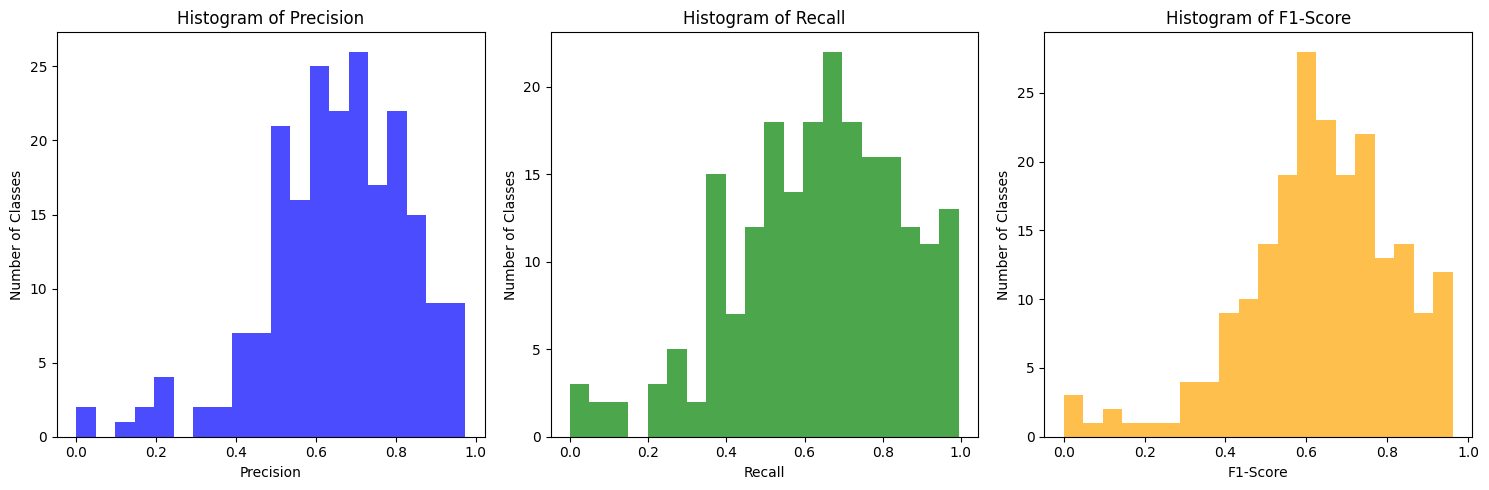

In [23]:
# Convert the report to a DataFrame for easier access to metrics
import pandas as pd

report_dict = classification_report(ytest_true_labels, ytest_pred_labels, target_names=label_encoder.classes_, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

# Extract precision, recall, and f1-score for each class
precision_values = report_df['precision'].dropna()
recall_values = report_df['recall'].dropna()
f1_values = report_df['f1-score'].dropna()

# Set up the figure for histograms
plt.figure(figsize=(15, 5))

# Plot histograms for precision, recall, and f1-score
plt.subplot(1, 3, 1)
plt.hist(precision_values, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Precision')
plt.xlabel('Precision')
plt.ylabel('Number of Classes')

plt.subplot(1, 3, 2)
plt.hist(recall_values, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Recall')
plt.xlabel('Recall')
plt.ylabel('Number of Classes')

plt.subplot(1, 3, 3)
plt.hist(f1_values, bins=20, color='orange', alpha=0.7)
plt.title('Histogram of F1-Score')
plt.xlabel('F1-Score')
plt.ylabel('Number of Classes')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
# Drop the last row (averages) and focus only on the classes
class_metrics_df = report_df.drop(columns=['support'])

# Get the top 5 classes for precision, recall, and f1-score, along with their support
top_5_precision = report_df[['precision', 'support']].sort_values(by='precision', ascending=False).head(5)
top_5_recall = report_df[['recall', 'support']].sort_values(by='recall', ascending=False).head(5)
top_5_f1 = report_df[['f1-score', 'support']].sort_values(by='f1-score', ascending=False).head(5)

# Get the worst 5 classes for precision, recall, and f1-score, along with their support
bottom_5_precision = report_df[['precision', 'support']].sort_values(by='precision').head(5)
bottom_5_recall = report_df[['recall', 'support']].sort_values(by='recall').head(5)
bottom_5_f1 = report_df[['f1-score', 'support']].sort_values(by='f1-score').head(5)

# Display the results
print("Top 5 classes by Precision:")
print(top_5_precision)
print("\nTop 5 classes by Recall:")
print(top_5_recall)
print("\nTop 5 classes by F1-Score:")
print(top_5_f1)

print("\nBottom 5 classes by Precision:")
print(bottom_5_precision)
print("\nBottom 5 classes by Recall:")
print(bottom_5_recall)
print("\nBottom 5 classes by F1-Score:")
print(bottom_5_f1)

Top 5 classes by Precision:
         precision  support
66016     0.973451    118.0
65448     0.950980    200.0
grysee1   0.950249    200.0
517119    0.944444    128.0
126247    0.933333    142.0

Top 5 classes by Recall:
           recall  support
134933   0.995000    200.0
roahaw   0.990000    200.0
126247   0.985915    142.0
trsowl   0.985000    200.0
compot1  0.980000    200.0

Top 5 classes by F1-Score:
         f1-score  support
134933   0.961353    200.0
65448    0.960396    200.0
126247   0.958904    142.0
compot1  0.953771    200.0
grysee1  0.952618    200.0

Bottom 5 classes by Precision:
         precision  support
secfly1   0.000000     25.0
548639    0.000000     18.0
963335    0.143678    200.0
1462737   0.157303    200.0
1139490   0.169231    200.0

Bottom 5 classes by Recall:
           recall  support
548639   0.000000     18.0
secfly1  0.000000     25.0
bobfly1  0.026316     38.0
1139490  0.055000    200.0
1462737  0.070000    200.0

Bottom 5 classes by F1-Score:
    

In [25]:
from tensorflow.keras import layers, models, Input

# Define the model
inputs = Input(shape=(1024,))
x = layers.Dense(512, activation='relu')(inputs)
x = layers.LayerNormalization()(x)

# Residual Block
x_shortcut = x
x = layers.Dense(512, activation='relu')(x)
x = layers.LayerNormalization()(x)
x = layers.Add()([x, x_shortcut])  # Residual connection

# Deeper layers
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Output layer
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Build the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show summary (optional)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1024)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 512)            │        524,800 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 512)            │          1,024 │ dense_5[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 512)            │        262,656 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 512)            │          1,024 │ dense_6[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 512)            │              0 │ layer_normalization_1… │
│                           │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 256)            │        131,328 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 256)            │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         32,896 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 206)            │         26,574 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 980,302 (3.74 MB)

 Trainable params: 980,302 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (usually validation loss or accuracy)
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Set to 1 to print messages when stopping happens
    mode='min',          # 'min' for loss/error metrics, 'max' for accuracy metrics
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
)

In [27]:
# --- Train Model ---
print("\nStarting model training...")
epochs = 100
history = model.fit(
    xtrain,
    ytrain_one_hot,
    epochs=epochs,
    validation_split=0.1, # Optional: use part of training data for validation during training
    callbacks=[early_stopping]
    # Or use validation_data=(xtest, ytest_one_hot) - be careful not to "tune" on test set
)

print("Model training finished.")

# --- Evaluate Model (Optional) ---
print("\nEvaluating model on the test set...")
loss, accuracy = model.evaluate(xtest, ytest_one_hot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Starting model training...
Epoch 1/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 56s 14ms/step - accuracy: 0.1340 - loss: 4.0729 - val_accuracy: 0.4089 - val_loss: 2.3766
Epoch 2/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - accuracy: 0.3591 - loss: 2.5900 - val_accuracy: 0.4757 - val_loss: 2.0534
Epoch 3/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 50s 13ms/step - accuracy: 0.4334 - loss: 2.2320 - val_accuracy: 0.5203 - val_loss: 1.8626
Epoch 4/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - accuracy: 0.4823 - loss: 2.0133 - val_accuracy: 0.5544 - val_loss: 1.7015
Epoch 5/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - accuracy: 0.5151 - loss: 1.8694 - val_accuracy: 0.5742 - val_loss: 1.6341
Epoch 6/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - accuracy: 0.5411 - loss: 1.7622 - val_accuracy: 0.5921 - val_loss: 1.5297
Epoch 7/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - accuracy: 0.5599 - loss: 1.6779 - val_accuracy: 0.6109 - val_loss: 1.4669
Epoch 8/100
3752/3752 ━━━━━━━━━━━━━━━━━━━

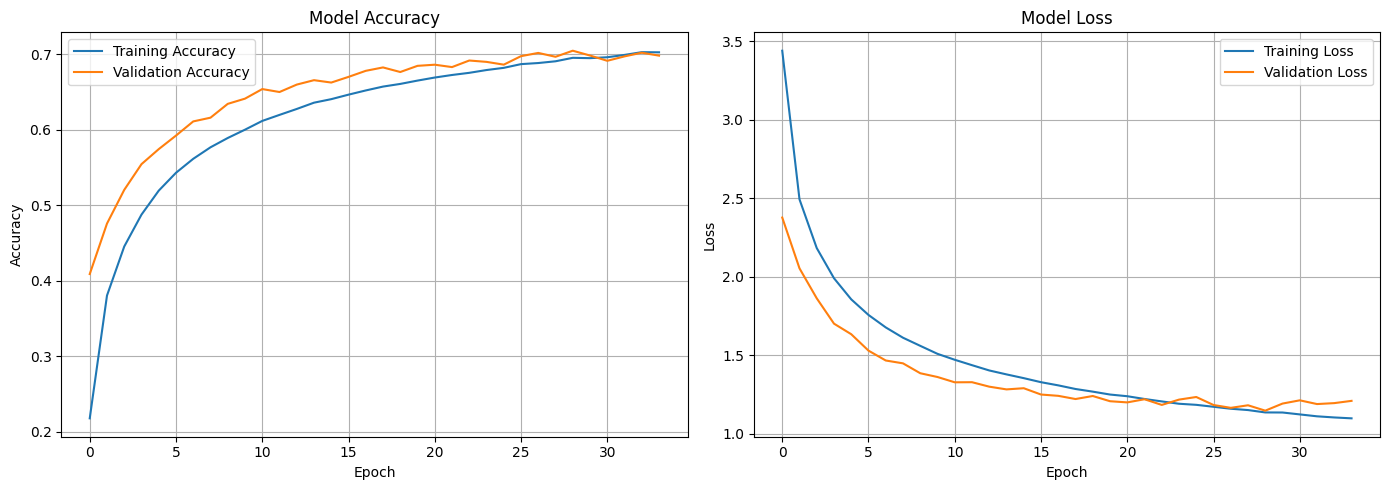

In [28]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# ---- Accuracy ----
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# ---- Loss ----
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [29]:
ytest_pred_probs = model.predict(xtest)  # Probabilities (N, 206)
ytest_pred_labels = np.argmax(ytest_pred_probs, axis=1)  # Predicted class indices
ytest_true_labels = np.argmax(ytest_one_hot, axis=1)     # True class indices

from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(ytest_true_labels, ytest_pred_labels, target_names=label_encoder.classes_))

1043/1043 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step

Classification Report:
              precision    recall  f1-score   support

     1139490       0.34      0.20      0.25       200
     1192948       0.28      0.38      0.33       200
     1194042       0.78      0.40      0.53       200
      126247       0.96      0.99      0.97       142
     1346504       0.89      0.82      0.86       200
      134933       0.99      0.99      0.99       200
      135045       0.80      0.80      0.80       200
     1462711       0.45      0.54      0.49       200
     1462737       0.23      0.13      0.17       200
     1564122       1.00      0.64      0.78        14
       21038       0.85      0.94      0.89       200
       21116       0.77      0.79      0.78        58
       21211       0.73      0.83      0.78        46
       22333       0.71      0.81      0.76       200
       22973       0.94      0.93      0.93       200
       22976       0.62      0.88      0.73       145
       24272  

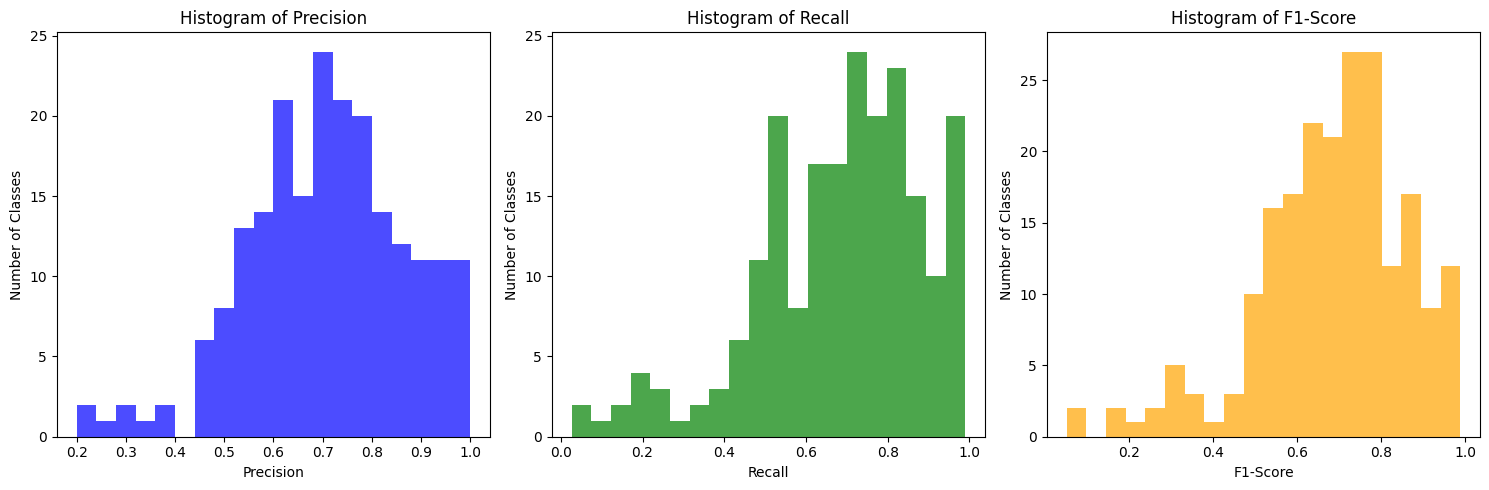

In [30]:
# Convert the report to a DataFrame for easier access to metrics
import pandas as pd

report_dict = classification_report(ytest_true_labels, ytest_pred_labels, target_names=label_encoder.classes_, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

# Extract precision, recall, and f1-score for each class
precision_values = report_df['precision'].dropna()
recall_values = report_df['recall'].dropna()
f1_values = report_df['f1-score'].dropna()

# Set up the figure for histograms
plt.figure(figsize=(15, 5))

# Plot histograms for precision, recall, and f1-score
plt.subplot(1, 3, 1)
plt.hist(precision_values, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Precision')
plt.xlabel('Precision')
plt.ylabel('Number of Classes')

plt.subplot(1, 3, 2)
plt.hist(recall_values, bins=20, color='green', alpha=0.7)
plt.title('Histogram of Recall')
plt.xlabel('Recall')
plt.ylabel('Number of Classes')

plt.subplot(1, 3, 3)
plt.hist(f1_values, bins=20, color='orange', alpha=0.7)
plt.title('Histogram of F1-Score')
plt.xlabel('F1-Score')
plt.ylabel('Number of Classes')

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
# Drop the last row (averages) and focus only on the classes
class_metrics_df = report_df.drop(columns=['support'])

# Get the top 5 classes for precision, recall, and f1-score, along with their support
top_5_precision = report_df[['precision', 'support']].sort_values(by='precision', ascending=False).head(5)
top_5_recall = report_df[['recall', 'support']].sort_values(by='recall', ascending=False).head(5)
top_5_f1 = report_df[['f1-score', 'support']].sort_values(by='f1-score', ascending=False).head(5)

# Get the worst 5 classes for precision, recall, and f1-score, along with their support
bottom_5_precision = report_df[['precision', 'support']].sort_values(by='precision').head(5)
bottom_5_recall = report_df[['recall', 'support']].sort_values(by='recall').head(5)
bottom_5_f1 = report_df[['f1-score', 'support']].sort_values(by='f1-score').head(5)

# Display the results
print("Top 5 classes by Precision:")
print(top_5_precision)
print("\nTop 5 classes by Recall:")
print(top_5_recall)
print("\nTop 5 classes by F1-Score:")
print(top_5_f1)

print("\nBottom 5 classes by Precision:")
print(bottom_5_precision)
print("\nBottom 5 classes by Recall:")
print(bottom_5_recall)
print("\nBottom 5 classes by F1-Score:")
print(bottom_5_f1)

Top 5 classes by Precision:
         precision  support
868458    1.000000     45.0
1564122   1.000000     14.0
bobfly1   1.000000     38.0
548639    1.000000     18.0
trsowl    0.989848    200.0

Top 5 classes by Recall:
           recall  support
compot1  0.990000    200.0
134933   0.990000    200.0
126247   0.985915    142.0
gretin1  0.985000    200.0
868458   0.977778     45.0

Top 5 classes by F1-Score:
         f1-score  support
868458   0.988764     45.0
134933   0.987531    200.0
trsowl   0.982368    200.0
grysee1  0.975000    200.0
126247   0.972222    142.0

Bottom 5 classes by Precision:
         precision  support
secfly1   0.200000     25.0
1462737   0.234234    200.0
963335    0.267327    200.0
1192948   0.284644    200.0
528041    0.315476    200.0

Bottom 5 classes by Recall:
           recall  support
bobfly1  0.026316     38.0
secfly1  0.040000     25.0
greegr   0.122449     49.0
1462737  0.130000    200.0
963335   0.135000    200.0

Bottom 5 classes by F1-Score:
    